# Quick Introduction to Computer Vision in Radiology

## James Ledoux<sup>1</sup>

### Basic Terminology

**Machine Learning (ML)**: Using a computer to "learn" something from data given to the program:
    * fitting a curve to data to learn a trend
**Computer Vision**: Using a computer to see interpret visual data:
    * Detect an object in an image
    * Segment an image
    * Classify/label an image
**Neural Network**: A type of ML algorithm that takes a set of inputs, a set of learned weights and biases, that transforms input into output.

**Deep Learning**: Doing ML with a deep (many hidden layers) neural network.


<sup>1</sup> James Ledoux, PhD (physics).  Programmer/Analyst/Data Scientist for Radiology Dept.  jal2018@med.cornell.edu<br/>I have no financial conflicts to disclose.

## What is a Neural Network?  Oversimplified Example: 

<img src="NeuralNetwork.png">

This example has 3 input features (three numbers), 2 hidden layers (one with 5 activations, one with 2 activations), and one output feature.

At each layer there are three distinct types of calculations:

1. multiplication of weights from the previous layer
2. summing all the multiplied weights leading to a node, adding in a (learned) bias term, and passing through a non-linear activation function.

Each arrow in the diagram is a learnable weight.

For example, the let values of the first hidden layer be called $a_{1}$ through $a_n$ with 15 learnable weights $w_{ij}$ and 5 learnable biases $b_i$.  Doing a forward pass through the network would give you:

$$a_{1} = {\textrm{ReLU}}(w_{11} x_{1} + w_{12} x_{2} + w_{13} x_{3} + b_{1})$$
    
$$a_{2} = {\textrm{ReLU}}(w_{21} x_{1} + w_{22} x_{2} + w_{23} x_{3} + b_{2})$$
   
$$a_{3} = {\textrm{ReLU}}(w_{31} x_{1} + w_{32} x_{2} + w_{33} x_{3} + b_{3})$$
    
$$a_{4} = {\textrm{ReLU}}(w_{41} x_{1} + w_{42} x_{2} + w_{43} x_{3} + b_{4})$$
    
$$a_{5} = {\textrm{ReLU}}(w_{51} x_{1} + w_{52} x_{2} + w_{53} x_{3} + b_{5})$$

Or in matrix terms:

\begin{equation}
  \begin{bmatrix}
    a_1 \\
    a_2 \\
    a_3 \\
    a_4 \\
    a_5 
  \end{bmatrix} =  {\textrm{ReLU}}\left(
  \begin{bmatrix}
    w_{11} & w_{12} & w_{13} \\
    w_{21} & w_{22} & w_{23} \\
    w_{31} & w_{32} & w_{33} \\
    w_{41} & w_{42} & w_{43} \\
    w_{51} & w_{52} & w_{53} 
  \end{bmatrix} 
  % 
  \begin{bmatrix}
   x_1 \\
   x_2 \\
   x_3
  \end{bmatrix} + 
  \begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3} \\
  b_{4} \\
  b_{5}
  \end{bmatrix}\right)
\end{equation}

   $$ \vec{a} = {\textrm{ReLU}}(W \vec{x} + \vec{b})$$
   
ReLU (Rectified Linear Unit) is the standard non-linear activation function, which does nothing when the input is positive and sets the value to zero when the input is negative:

$${\textrm{ReLU}}(x) = max(x,0) = \left\{
\begin{array}{ll}
      x & x\gt 0 \\
      0 & x \leq 0 \\
\end{array} 
\right. $$

Similarly the next hidden layer ($a'$) and output ($y$) layer have similar relationships:

\begin{equation}
  \begin{bmatrix}
    a'_1 \\
    a'_2
  \end{bmatrix} =  {\textrm{ReLU}}\left(
  \begin{bmatrix}
    w'_{11} & w'_{12} & w'_{13} & w'_{14} & w'_{15} \\
    w'_{21} & w'_{22} & w'_{23} & w'_{24} & w'_{25}\\
  \end{bmatrix} 
  % 
  \begin{bmatrix}
   a_1 \\
   a_2 \\
   a_3 \\
   a_4 \\
   a_5
  \end{bmatrix} + 
  \begin{bmatrix}
  b'_{1} \\
  b'_{2} \\
  \end{bmatrix}\right)
\end{equation}

\begin{equation}
  \begin{bmatrix}
    y
  \end{bmatrix} =  f\left(
  \begin{bmatrix}
    w''_{11} & w''_{12} \\
  \end{bmatrix} 
  % 
  \begin{bmatrix}
   a'_1 \\
   a'_2
  \end{bmatrix} + 
  \begin{bmatrix}
  b''_{1} \\
  \end{bmatrix}\right)
\end{equation}

Or in vector form, the next layer of the network is calculated from the previous one as:

   $$ \vec{a} =  {\textrm{ReLU}}(W \vec{x} + \vec{b})$$
   $$ \vec{a}' = {\textrm{ReLU}}(W' \vec{a} + \vec{b}')$$
   $$ \vec{y} = f(W'' \vec{a}' + \vec{b}'')$$   

Note for the final layer, the function applied is typically not a ReLU, but something that transforms data into the realm of expected output.  For example, if you are predicting a single probability you could use a sigmoid like $f(z) = 1/(1 + e^{-z})$ function, so the output values stay between zero and one.  Or if your output layer has several nodes representing distinct probabilities for classification, you would use softmax function.

Aside: Why non-linear activation functions?  Imagine the ReLUs were not there.  Then we'd have: 

$$\vec{y} = f\left(W'' \left[W' (W \vec{x} + \vec{b}) + \vec{b}'\right] + \vec{b}''\right)$$
$$\vec{y} = f\left(W^* \vec{x} + \vec{b}^*\right)$$

if we define $W^* = W'' W' W$ and $\vec{b}^* = W''(W' \vec{b} + \vec{b}') + \vec{b}''$.  That is without the non-linear activation functions our hidden layers disappear and we have the learning power of a model with zero hidden layers.

## How to learn

* label a dataset (set of inputs $\vec{x}$) with associated output values ($\vec{y}$).
* split labeled dataset into training and validation set.  (Maybe also leave test set out).

* define a loss function that your neural net will minimize.  E.g., $$Loss = \frac{1}{n}\sum_n (y_{pred} - y_{act})^2$$

* Aside 1: if you have asymmetric distribution of data classes you need to be careful constructing a loss function.  If you are predicting presence of a rare cancer (only in 0.1% of cases) and just measuring error rate, you could get a 0.1% error rate by always predicting no cancer.

The goal of neural net **training** is to alter the values of the weights and biases to minimize this loss function.

How?  **Backpropagation** to estimate the gradient in parameter space (essentially the chain rule from calculus for a neural net) for gradient descent to find the direction to alter the weights.  In practice, pytorch or tensorflow will automatically do these calculations for you.  
To start, you randomly initialize your weights and biases.  (E.g., say a bell curve normalized around 0 with std dev 1).  You run a batch of your training data through the neural net, and backpropagate to calculate the gradient to find the direction to slightly change the values of the weights in an attempt to shrink the loss function.

You have a small training rate $\alpha \sim 0.005$ that you multiply this gradient by and alter the values of all your weights and biases, and then you repeat, until the loss function stops shrinking on your **validation set**.

There is also the concept of **momentum** used in optimization to speed up convergence at a minimum.  You recall the combine the direction you were moving in for previous steps along with the current gradient.  This may cancel out movement in oscillatory directions in weight space.

<table><tr><th><center>No Momentum</center></th><th><center>With Momentum</center></th></tr>
    <tr><td><img src="stochastic.png"></td><td><img src="momentum.png"></td></tr></table>

## Prevent Overfitting with Regularization

Neural networks have lots of free parameters and it is possible to overfit if you overtrain your training data 

<img src="Overfitted_Data.png">

An overfit model will generalize **poorly**, perfect for training data, bad for new data.

While a simpler model with fewer parameters could be used to reduce overfitting, the best methods is regularization:

1. Add a **regularization term** to your loss function.  E.g., the sum of every weight squared times a tunable hyperparameter $\beta$ (to adjust the level of regularization).  $$Loss_{reg} =  \frac{1}{n}\sum_n (y_{pred} - y_{act})^2 + \beta \sum_i w_i^2$$
2. Add **dropout** (where during training you randomly zero out some percentage of activations) to ensure your model learns to predict similar features in different ways ( https://arxiv.org/abs/1207.0580 )
3. Use **data augmentation** of your labeled dataset:
    * Mirror Images
    * Randomly Crop Images
    * Randomly Rotate Images
    * Randomly Skew Images
    * Add Gaussian Noise

## Moving to Images - Convolutional Neural Networks (CNN)

Images are largely redundant and pixels aren't independent.  An image shifted a few pixels looks the same or resized.

So instead of fully-connected neural network we use convolutions.  

A **convolution** takes a small kernel (e.g., a 3x3 matrix of weights) and drags this kernel across the image and point-wise multiplies the kernel matrix by a kernel-sized chunk of the image.

Interactive Example:  http://setosa.io/ev/image-kernels/

<img src="convolution_alt.png">

A convolution can be used to identify the presence of features in the image. 

Each convolution layer of a CNN will not involve a single convolutional kernel, but dozens to hundreds of kernels with learned weights.

Note from the perspective of an unrolled image (converting the 2-d image to 1-d array), a convolution is a matrix multiplication of a sparse weight matrix with repeated indexes. 

CNNs also involve techniques like **Max Pooling** to identify prominent features.

<img src="Maxpool.png">

**Batch Normalization** is also used to keep the network in a good regime for learning.  A Batch Normalization layer first calculates the mean and standard deviations of activations across a batch to keep the activations with a mean of 0 and std dev of 1, and then adds a two new parameters ($\gamma$, $\beta$) (shared among all activations in the layer) of a new global weight and bias.
$$ y_i^{BN} = \gamma \hat{x_i} + \beta $$
( https://arxiv.org/abs/1502.03167 )

## Transfer Learning

Training an entire network from scratch tends to be a long procedure.

You can gain a significant speed up by starting with a neural network trained on a related imaging problem.

You freeze all the weights except the last layer (and maybe some batch norm layers).

Then once you are near a good layer, you can unfreeze the entire network and slowly learn further.

## Interesting Architectures

### ResNet: Residual Network

It was discovered that deeper CNNs are harder to train and plateau at a higher level of error on training and validation sets: 

<img src='resnet_accuracy.png'>

Very deep networks often run into the **vanishing gradient problem**, where the gradient quickly becomes very small which slows learning to a near halt.

**ResNet** ( https://arxiv.org/abs/1512.03385 ) helps avoid this by providing skip connections, where previous activation layers are mixed with the outputs of the recent layer:
<img width='50%' src="skip_connection.png">

### U-Net for Segmentation

Traditional CNNs typically lose location information, so you wouldn't be able to easily detect an interesting region in an image. 

U-Nets ( https://arxiv.org/abs/1505.04597 ) use a U-shaped architecture of CNN that detect segmented features.  First there's a downward pass of convolutions as more complex features are learned (but location information is generally lost).  Then there's an equivalent procedure of convolutions that increase dimensional information as well as copying features from the other side of the network (before it was shrunk).  These links to the larger sized images allow image segmentation of learned features.

<img src="Unet.png">


### Mask-RCNN for Image Segmentation
A different approach to image segmentation is Mask-RCNN ( https://arxiv.org/abs/1703.06870 )

The family of RCNN (Region-based CNN), Fast RCNN, Faster RCNN, and finally Mask-RCNN essentially searches for regions of interest (or using a learned Regional Proposal Network) in the image and runs and classifier on it and after classification improves on the segmentation.  RCNN, Fast RCNN, and Faster RCNN only generated bounding boxes, but Mask-RCNN adds a mask using a full-connected layers to properly align RoIs at the pixel level.

<img src="maskrcnn.png">


### EfficientNet

Traditionally, you take a model and make it deeper ($d$ - more hidden layers) or wider ($w$ - more convolutional kernels per layer) or deal with higher resolution ($r$) images.

The EfficientNet ( https://arxiv.org/abs/1905.11946 ) design scales these parameters simultaneously to build a series of increasingly complex networks that optimally increases depth ($d$), width ($w$), and resolution ($r$) according to:

$$ d = d_0 * 1.2^\phi $$
$$ w = w_0 * 1.1^\phi $$
$$ r = r_0 * 1.15^\phi $$

These produce start of the art results with fewer parameters and FLOPs on image classification problems:

<table><tr><td><img src="efficientnet_1.png"></td><td><img src="efficientnet_5.png"></td></tr></table>

They've published pretrained models for transfer learning.

It also achieves efficient performance through Squeeze-and-Excitation blocks ( https://arxiv.org/abs/1709.01507 ) and linear bottleneck layers (from MobileNetV2 - https://arxiv.org/abs/1801.04381 )

## Resources to learn more

* <a href='https://fast.ai'>Fast.ai</a> course: https://course.fast.ai/  (free - Jeremy Howard)
* <a href='https://www.deeplearning.ai'>Deeplearning.ai</a> courses: https://www.deeplearning.ai (Andrew Ng)

* Learn pytorch: https://pytorch.org/tutorials/
* Learn tensorflow: https://www.tensorflow.org/tutorials/quickstart/beginner


## Fast AI ML example using SIIM pneumothorax challenge

In [1]:
import os
import fastai
from fastai.vision import *
pneumo_path = Path('/home/jledoux/computer_vision_talk/pneumothorax/')
data_path = pneumo_path/'data/data256'
os.chdir(pneumo_path)
from mask_functions import *
import torch
torch.cuda.set_device(1)

In [2]:
class SegmentationLabelList(SegmentationLabelList):
    def open(self, fn): 
        return open_mask(fn, div=True)

class SegmentationItemList(SegmentationItemList):
    _label_cls = SegmentationLabelList

def transform(self, tfms:Optional[Tuple[TfmList,TfmList]]=(None,None), **kwargs):
    if not tfms: tfms=(None,None)
    assert is_listy(tfms) and len(tfms) == 2
    self.train.transform(tfms[0], **kwargs)
    self.valid.transform(tfms[1], **kwargs)
    kwargs['tfm_y'] = False
    if self.test: self.test.transform(tfms[1], **kwargs)
    return self

fastai.data_block.ItemLists.transform = transform

data = (SegmentationItemList.from_folder(path=data_path/'train')
             .split_by_rand_pct(0.2)
             .label_from_func(lambda x: str(x).replace('train', 'masks'), classes=[0,1])
             .add_test_folder(data_path/'test', label=None)
             .transform(get_transforms(), size=256, tfm_y=True)
             .databunch(bs=16)
             .normalize(imagenet_stats)
            )

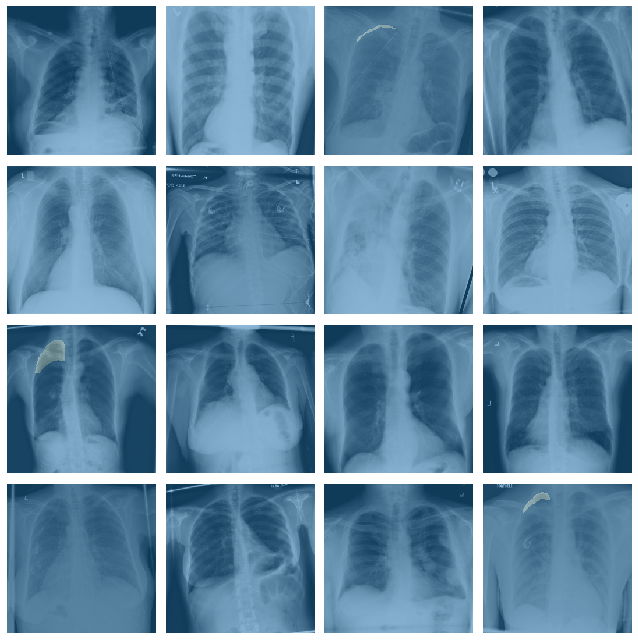

In [3]:
data.show_batch(rows=4, ds_type=DatasetType.Train, figsize=(9,9))

In [4]:
data

ImageDataBunch;

Train: LabelList (8568 items)
x: SegmentationItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegmentationLabelList
ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256)
Path: /home/jledoux/computer_vision_talk/pneumothorax/data/data256/train;

Valid: LabelList (2142 items)
x: SegmentationItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegmentationLabelList
ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256),ImageSegment (1, 256, 256)
Path: /home/jledoux/computer_vision_talk/pneumothorax/data/data256/train;

Test: LabelList (1377 items)
x: SegmentationItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /home/jledoux/computer_

In [5]:
learn = unet_learner(data, models.resnet34)

In [6]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
__________________________________________________

In [7]:
!nvidia-smi

Tue Oct  8 02:53:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX TIT...  Off  | 00000000:05:00.0 Off |                  N/A |
| 22%   51C    P8    14W / 250W |   5475MiB / 12210MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX TIT...  Off  | 00000000:06:00.0 Off |                  N/A |
| 60%   77C    P2   113W / 250W |   1028MiB / 12212MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:
learn.lr_find(end_lr=.5, wd=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


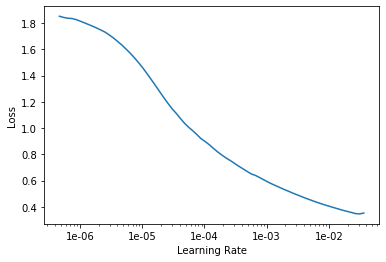

In [9]:
learn.recorder.plot()

In [10]:
lr=1e-3
learn.fit_one_cycle(6, lr)

epoch,train_loss,valid_loss,time
0,0.018048,0.016043,06:05
1,0.013682,0.012719,06:00
2,0.013881,0.015811,05:59
3,0.010478,0.011214,05:59
4,0.009437,0.011142,06:01
5,0.008946,0.010190,06:00


In [11]:
learn.save('pneumothorax_v1_frozen_save6')

In [12]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(4, slice(lr/30, lr))

epoch,train_loss,valid_loss,time
0,0.010085,0.011454,06:14
1,0.010270,0.011061,06:12
2,0.011211,0.010577,06:11
3,0.009006,0.009997,06:11


In [15]:
learn.save('pneumothorax_v1_unfrozen_save4')

In [16]:
preds, ys = learn.get_preds()
preds = preds[:,1,...]
ys = ys.squeeze()
ys

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [17]:
def dice_overall(preds, targs):
    n = preds.shape[0]
    preds = preds.view(n, -1)
    targs = targs.view(n, -1)
    intersect = (preds * targs).sum(-1).float()
    union = (preds+targs).sum(-1).float()
    u0 = union==0
    intersect[u0] = 1
    union[u0] = 2
    return (2. * intersect / union)


In [18]:
# Find optimal threshold
dices = []
thrs = np.arange(0.01, 1, 0.01)
for i in progress_bar(thrs):
    preds_m = (preds>i).long()
    dices.append(dice_overall(preds_m, ys).mean())
dices = np.array(dices)


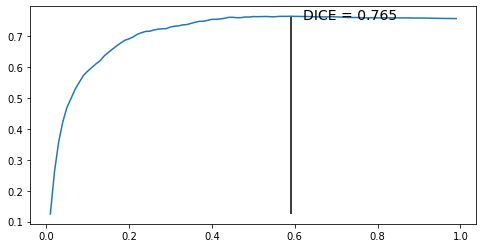

In [19]:
best_dice = dices.max()
best_thr = thrs[dices.argmax()]

plt.figure(figsize=(8,4))
plt.plot(thrs, dices)
plt.vlines(x=best_thr, ymin=dices.min(), ymax=dices.max())
plt.text(best_thr+0.03, best_dice-0.01, f'DICE = {best_dice:.3f}', fontsize=14);
plt.show()

In [28]:
# Predictions for test set
preds, _ = learn.get_preds(ds_type=DatasetType.Valid)
preds = (preds[:,1,...]>best_thr).long().numpy()
print(preds.sum())


58787


In [29]:
len(preds)

2142

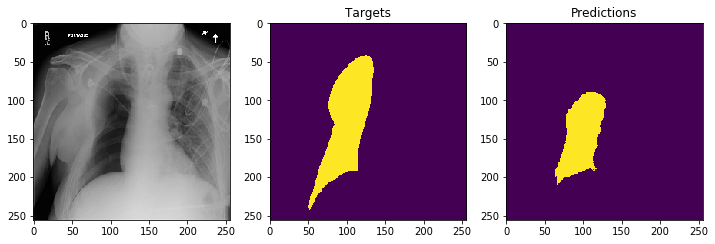

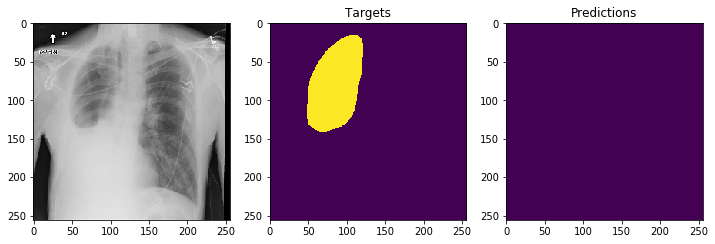

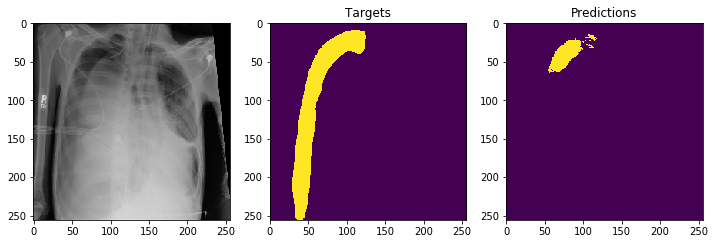

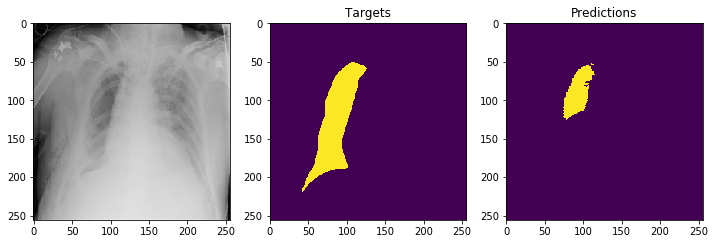

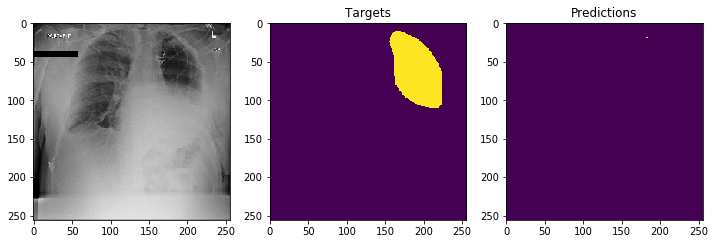

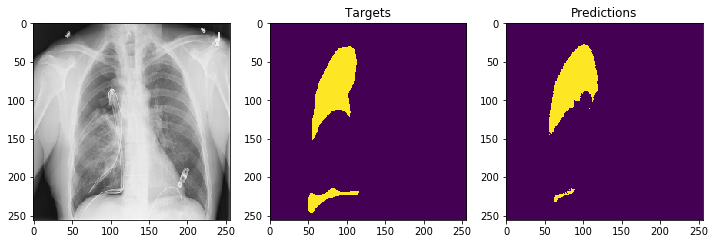

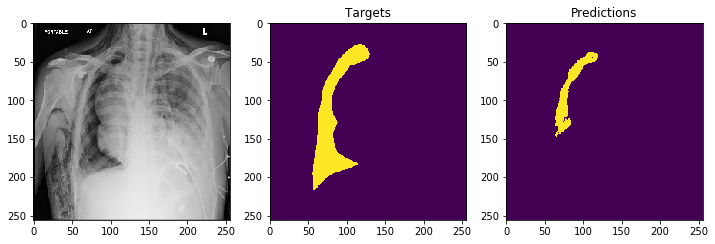

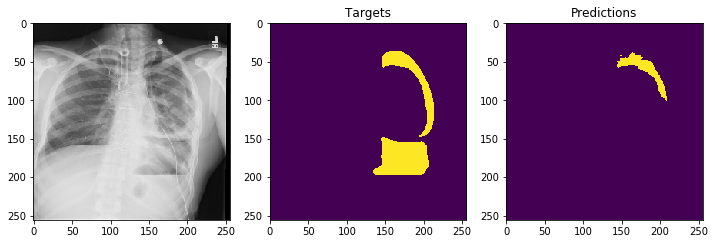

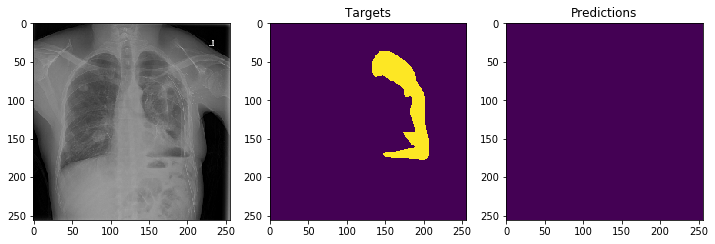

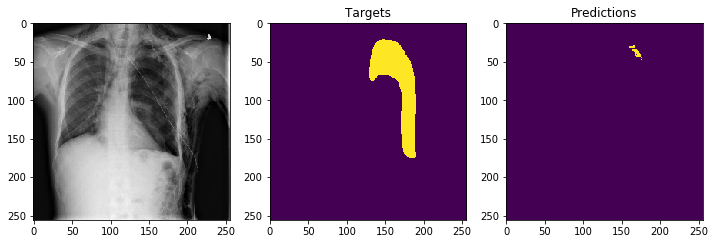

In [30]:
# Plot some samples
rows = 10
plot_idx = ys.sum((1,2)).sort(descending=True).indices[:rows]
for idx in plot_idx:
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))
    ax0.imshow(data.valid_ds[idx][0].data.numpy().transpose(1,2,0))
    ax1.imshow(ys[idx], vmin=0, vmax=1)
    ax2.imshow(preds[idx], vmin=0, vmax=1)
    ax1.set_title('Targets')
    ax2.set_title('Predictions')